<a href="https://colab.research.google.com/github/Jacin21/Assessment15-16/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd

**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn import preprocessing
df["Gender"]=df[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)
data=df.drop(columns="User ID")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
data['Purchased'].unique().sum()

1

**Splitting the dataset into the Training set and Test set**

In [ ]:
X=data.drop('Purchased',axis=1)
Y=data.Purchased

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(max_depth=2)
tree_1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [ ]:
y_pred = tree_1.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[55,  3],
       [ 1, 21]])

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'x[1] <= 44.5\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.25, 0.5, 'x[2] <= 90500.0\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(0.75, 0.5, 'x[2] <= 41500.0\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.362\nsamples = 59\nvalue = [14, 45]')]

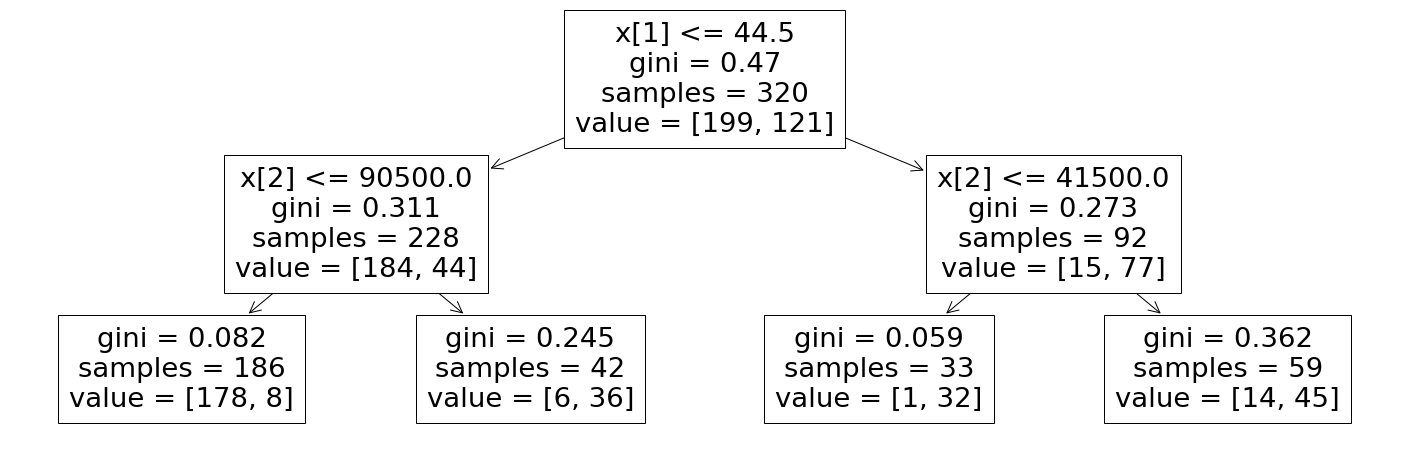

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(25,8))
tree.plot_tree(tree_1.fit(X_train, Y_train))

**Visualising the Test set results**

[Text(0.5, 0.8333333333333334, 'x[1] <= 42.5\ngini = 0.399\nsamples = 80\nvalue = [58, 22]'),
 Text(0.25, 0.5, 'x[2] <= 130500.0\ngini = 0.123\nsamples = 61\nvalue = [57, 4]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.065\nsamples = 59\nvalue = [57, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.5, 'x[1] <= 48.0\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

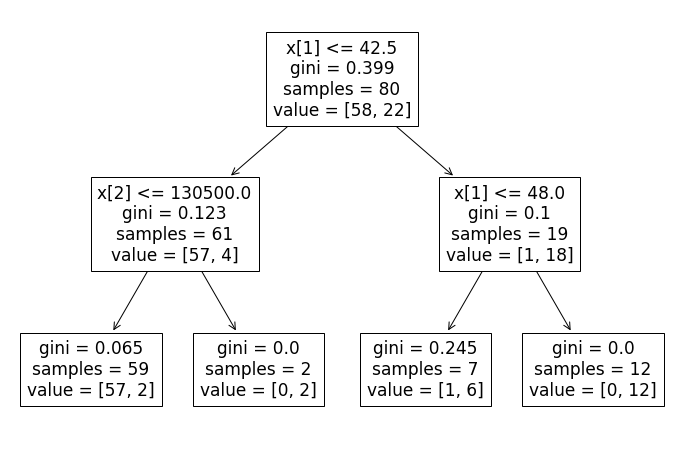

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_1.fit(X_test, Y_test))